<a href="https://colab.research.google.com/github/BurhanAmir/Machine-Learning-Project/blob/main/ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Setup | Importing necessary Libraries\**

In [30]:
# Before diving into the actual part, lets bring the important libraries and extensions.

import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt
import os
import gdown         # To access the material from google drive.
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_recall_curve, average_precision_score)
from plotly.subplots import make_subplots
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# For reproducibility
RANDOM_SEED = 42

**Mounting the Google Drive\**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing dataset using the Google drive.\**

In [32]:
# Downloading dataset file from google drive.
!pip install --quiet gdown

# File ID from the shared link
dataset_id = "1j8dxLoIHIel8J8DY36xUyT-BO37-zvZo"
url = f"https://drive.google.com/uc?id={dataset_id}"
output = "dataset.csv"

# Download only if not already downloaded
if not os.path.exists(output):
    print(" Downloading dataset from Google Drive …")
    gdown.download(url, output, quiet=False)
else:
    print(" Dataset already exists locally – skipping download.")

# Load into pandas DataFrame
df = pd.read_csv(output)

# Quick check
print("\nDataset loaded.")


 Dataset already exists locally – skipping download.

Dataset loaded.


**Few enteries of the datset.\**

In [33]:
display(df.head(100))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


**All of the unique values of the variables (dataset columns).**

In [34]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

**General insights about data.\**     EDA (Explorartory Data Analysis)

In [35]:
# Quick info
print("This defines number of rows(data entries) + columns (variables) of the dataset.")
print(df.shape)

print("\nAll Columns name: ")
print(df.columns.tolist())

print("\nBasic Info Before Fixing Data Types:\n")
print(df.info()) # Check basic info about dataset

print("\n \n This is a comprehensive statistical summary of all columns.")
df.describe(include='all').T

This defines number of rows(data entries) + columns (variables) of the dataset.
(7043, 21)

All Columns name: 
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Basic Info Before Fixing Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   obje

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# STEP 1: Data Manipulation + Handling(imputing) Missing Values and Fixing Data Types
*Machine learning algorithms cant be directly apply to different categories of data, specifically text. Also there are NaNs in the dataset,which represents missing values. Therefore its cumpolsary to convert them to numeric form, otherwise model cant operate at its optimal. As computers can only comprehend numbers.*

In [36]:
# Convert 'TotalCharges' to numeric (it often has blank spaces) #Tarnsforming TotalCharges first as its type is appearing to be object (text).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')               # Converting to numeric (if erros they becomes NAN)

# During data exploration it was discovered that total charges are 0, even tho there are entries for monthly charges.
mask = df['TotalCharges'].isna() & (df['tenure'] > 0)
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'MonthlyCharges'] * df.loc[mask, 'tenure'] # Calculating the missing TotalCharges using MonthlyCharges * tenure, where value was 0.


#  Check missing values after conversion
print("\nMissing Values After Type Fix:\n")
print(df.isnull().sum())

# Filling up the missing values of columns, based on variable type. (sensible proxy)
for col in df.columns:
    if df[col].dtype == 'object':  # Using the mode for categorical columns.
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:
        mean_val = df[col].mean()   # Using the mean for numerical columns.
        df[col] = df[col].fillna(mean_val)

# 5️⃣ Confirm no missing values remain
print("\nMissing Values After Fix:\n")
print(df.isnull().sum())

# 6️⃣ Double check all data types
print("\nData Types of all of the variables after fixing:\n") # Now TotalCharges is representing correct data type (float)
print(df.dtypes)



Missing Values After Type Fix:

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing Values After Fix:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Chu

#Converting the target label ----> binary
\**As its a binary classification, prediction for the churn could be either yes or no.**

In [37]:
# Converting the target column 'Churn' to numeric (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check final distribution
print("\nChurn value counts:\n", df['Churn'].value_counts(dropna=False))



Churn value counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64


# STEP 2: Identifying Labels & Features | Encoding + Scaling Pipeline
As models only understand numbers, in the dataset some columns got categorical data, so OneHotEncoder will convert them into 0s and 1s safely, so computers can understand it. Scaling of numeric columns in cumpolsary so one single column doesnt influence the rest of the churn. For example tenure has only 72 unique entries, while total charges has 0-7k, so scaling helps in fair model training for linear models. Keeping them in the preprocessor helps to reuse them. As machine cant understand textual data, they can understand numbers only. This proccess is called encoding, which we are doing through the pipeline.

In [38]:
# 1) Spliting features and target
X = df.drop(columns=['Churn']) #these are the features
y = df['Churn']                #this is a target label

# Dropping useless ID column (as this brings noise to the dataset)
X = X.drop(columns=['customerID'])

# 2) Assigning the numerical columns to numeric and categorical to category.
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# 3) Developing a simple preprocessing block:
# This applies different pre-processing on differnt columns.
#    - Numeric: fill missing with mean, then scale (helps Logistic Regression)
#    - Categorical: fill missing with most frequent, then One-Hot encode
numeric_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])

categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]) # handleUnknown prevents errors, if new columns pop out while testing.

preprocessor = ColumnTransformer(transformers=[('num', numeric_pipeline, numeric_cols),('cat', categorical_pipeline, categorical_cols)],remainder='drop'  ) #remainder = only use the columns specified


# 4) Quick preview to make sure encoding works (no training yet)
preprocessor.fit(X)                # x represents features of total dataset, excluding target
X_preview = preprocessor.transform(X)

print("\nAfter encoding + scaling:")
print("Shape (rows, features):", X_preview.shape)

# 5) Displaying feature names
try:
    feature_names = preprocessor.get_feature_names_out()
    print("\nTotal feature count:", len(feature_names))
    print("Sample feature names:", feature_names[:15])
except Exception as e:
    print("\nFeature names not available in this sklearn version. That's okay.")


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

After encoding + scaling:
Shape (rows, features): (7043, 45)

Total feature count: 45
Sample feature names: ['num__SeniorCitizen' 'num__tenure' 'num__MonthlyCharges'
 'num__TotalCharges' 'cat__gender_Female' 'cat__gender_Male'
 'cat__Partner_No' 'cat__Partner_Yes' 'cat__Dependents_No'
 'cat__Dependents_Yes' 'cat__PhoneService_No' 'cat__PhoneService_Yes'
 'cat__MultipleLines_No' 'cat__MultipleLines_No phone service'
 'cat__MultipleLines_Yes']


# STEP 3: EDA (Explorartory Data Analysis) with Visual Plots
This section provides few visual diagrams such as histograms(for data distribution), boxplots (to spot outliers) and correlation heatmap (to spot collinearity). These help to determine hidden patterns of different variables, their relationship with target label and valuable insights about data which is easy to understand.

Dataset shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1



Basic statistics:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000



Missing values (should be none now):
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


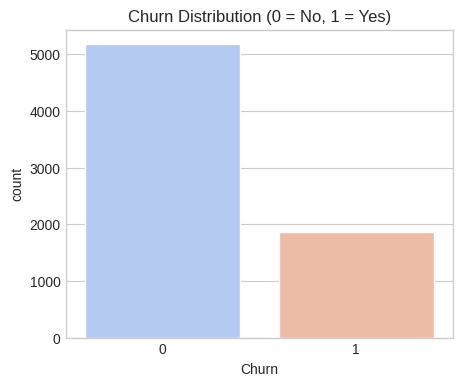

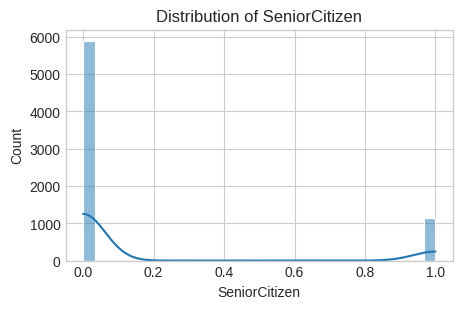

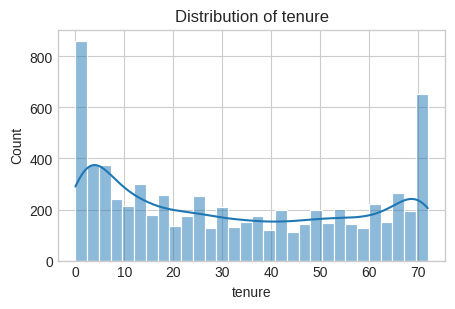

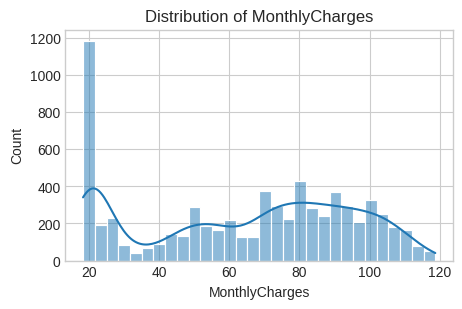

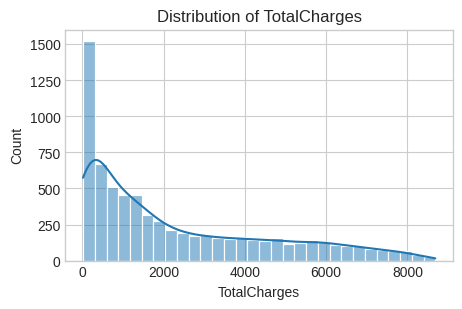

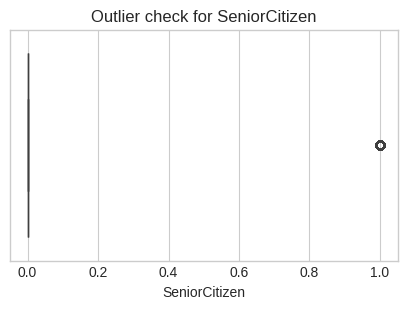

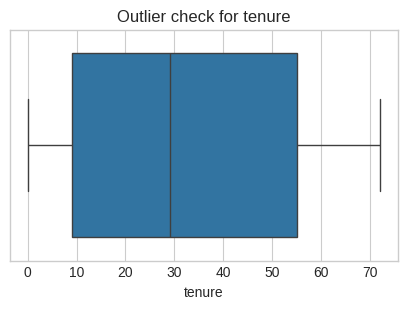

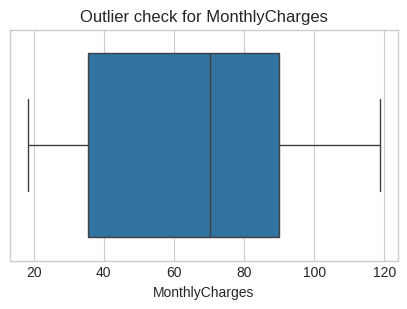

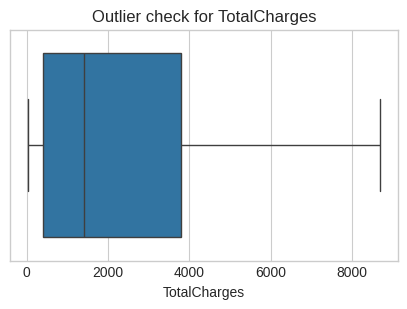

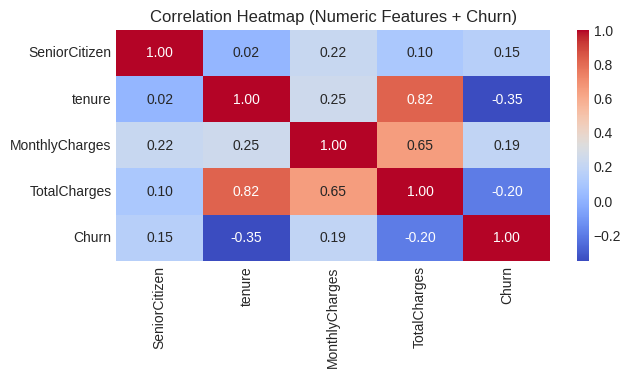

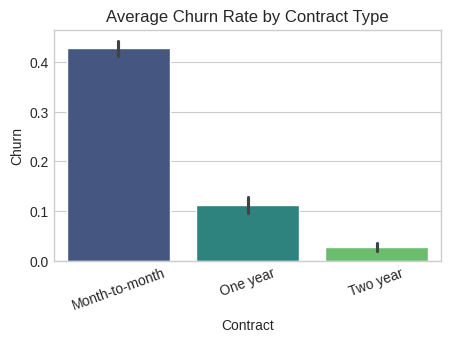

In [39]:
# STEP 3: Exploratory Data Analysis (EDA)

plt.style.use('seaborn-v0_8-whitegrid') # Make plots look cleaner

#1 Quick look at dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nBasic statistics:")
display(df.describe())

print("\nMissing values (should be none now):")
print(df.isnull().sum())

#2 Churn distribution (class balance for the churnerns vs non-churners)
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='coolwarm', legend=False)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

#3 Numeric columns distribution
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

#4 Boxplots to spot outliers
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check for {col}")
    plt.show()

#5 Correlation heatmap (numerical columns only)
plt.figure(figsize=(7,3))
sns.heatmap(df[numeric_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features + Churn)")
plt.show()

#6 Simple insight check: average churn by contract type
plt.figure(figsize=(5,3))
sns.barplot(x='Contract', y='Churn', hue='Contract', data=df, palette='viridis', legend=False)
plt.title("Average Churn Rate by Contract Type")
plt.xticks(rotation=20)
plt.show()


# STEP 3: EDA again
Some more visuals to understand this dataset, to determine maybe if any column (variable) has skew or its relation with the label.

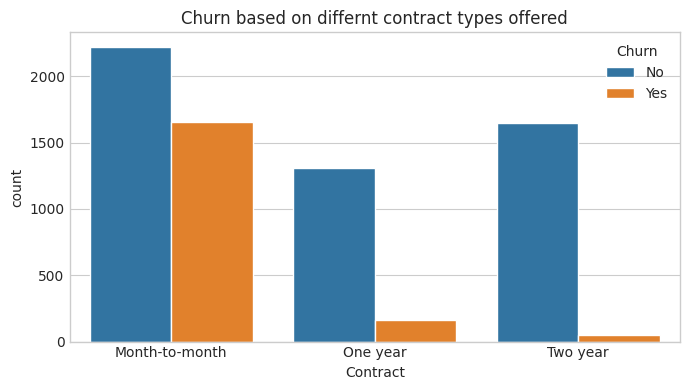

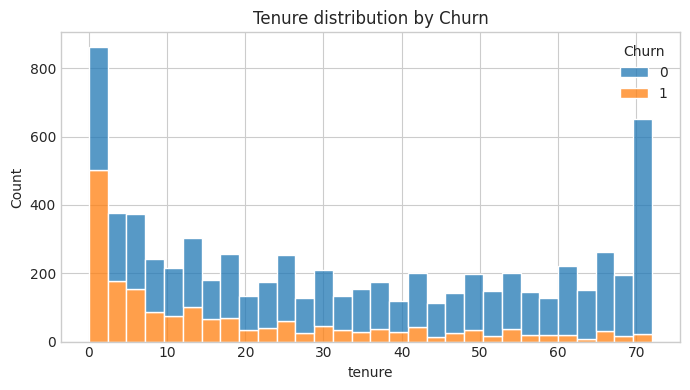

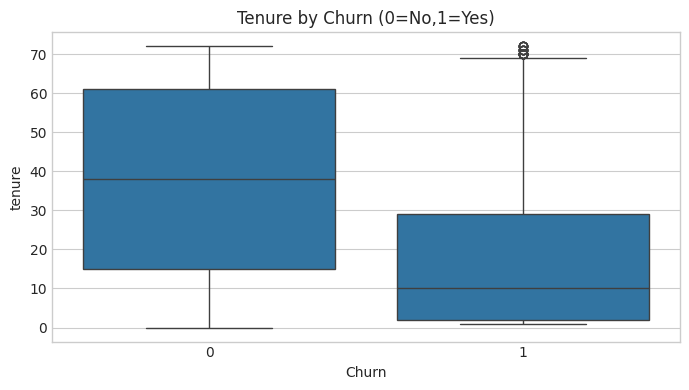

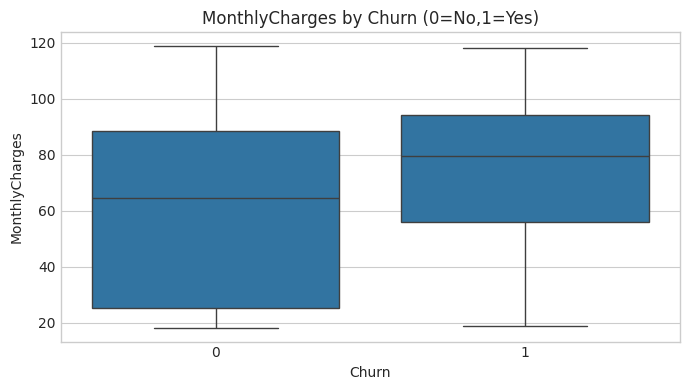

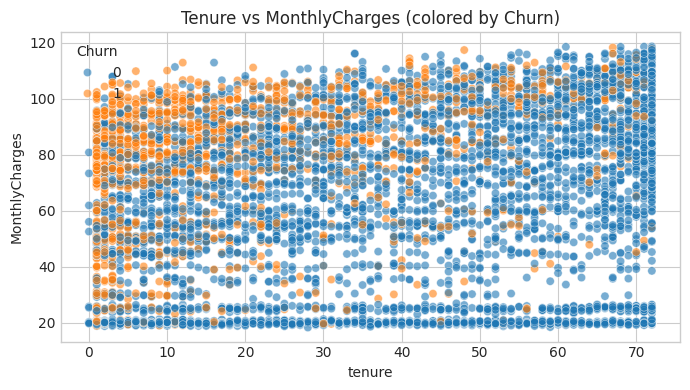

In [40]:
# Churn by Contract Type
sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn based on differnt contract types offered")
plt.xlabel("Contract")
plt.legend(title='Churn', labels=['No','Yes'])
plt.tight_layout()
plt.show()

# Tenure vs Churn: show distribution of tenure grouped by churn
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure distribution by Churn")
plt.tight_layout()
plt.show()

# Or boxplot: tenure by churn
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure by Churn (0=No,1=Yes)")
plt.tight_layout()
plt.show()

# MonthlyCharges vs Churn (boxplot + swarm for detail)
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("MonthlyCharges by Churn (0=No,1=Yes)")
plt.tight_layout()
plt.show()

# Scatter Tenure vs MonthlyCharges colored by churn
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title("Tenure vs MonthlyCharges (colored by Churn)")
plt.tight_layout()
plt.show()


# STEP 4: Train and Split Dataset 70% for training, 30% for testing

After a comprehensive look and understanding at the dataset enteries, now its the best time to split the dataset, so it can be used for training and the testing. This is ideally the best time to split the dataset because splitting it afterwards the model training often leads to data leaks and also helps holding out optimal performance for the models which would be trained. Splitting the dataset could be done in various ratios too (such as [50/50,70/30, 80,20])etc, but the most crucial part here is the stratify which ensures that the label target "churn" gets evenly distributed between the training and testing sets. Otherwise model can be trained on a easy or difficult(uneven) dataset, which wont be efficient.
Once the dataset is splitted, the training one will be used for the model training and afterwards testing one will be used for evaluation.

In [41]:
# Split data into training and testing parts
# test_size = 0.3 means 70% train, 30% test
# stratify=y keeps same churn ratio in both sets
# random_state fixes randomness so results are reproducible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_SEED, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
rate_train = y_train.mean()
rate_test  = y_test.mean()
print(f"\nChurn rate (train): {rate_train*100:.2f}% ({rate_train:.18f})")
print(f"Churn rate (test):  {rate_test*100:.2f}% ({rate_test:.18f})")

Train size: (4930, 19)
Test size: (2113, 19)

Churn rate (train): 26.53% (0.265314401622718077)
Churn rate (test):  26.55% (0.265499290108849983)


# STEP 5: Model Setup — Logistic Regression + Random Forest + XGBoost
To cover the wide range of machine learning paradigms, three state of the art machine learning algorithms are being utilised.
Logistic Regression (fast baseline model, linear interpretable)
RandomForest (strong, efficient on tablular data)
XG Boost (gradient boosted tree, works best on structured data)


There is a pipeline for each model, this pipeline ensures symmetrical (same) preprocessing and steps are applied on all of the algorithms.

In [42]:
# STEP 5: Model Setup — Logistic Regression + Random Forest + XGBoost (simplified)

# Build simple pipelines for each model
logreg_pipe = Pipeline([("preprocess", preprocessor),("model", LogisticRegression(max_iter=1000, random_state=42))])

rf_pipe = Pipeline([("preprocess", preprocessor),("model", RandomForestClassifier(random_state=42))])


xgb_pipe = Pipeline([("preprocess", preprocessor),("model", XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1,subsample=0.9, colsample_bytree=0.9,eval_metric="logloss", random_state=42, tree_method="hist"))]) #nEstimator=num of trees, maxDepth=depth of tree, hist = fast learning

# Train all models
print("Training models...")
logreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
xgb_pipe.fit(X_train, y_train)
print("Training complete.")

# Quick accuracy check on test set
def quick_acc(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} → Accuracy: {accuracy_score(y_test, y_pred)*100:.3f}%  ({accuracy_score(y_test, y_pred):.3f})")

print("\nQuick Test Accuracies:")
quick_acc(logreg_pipe, "Logistic Regression")
quick_acc(rf_pipe, "Random Forest")
quick_acc(xgb_pipe, "XGBoost")


Training models...
Training complete.

Quick Test Accuracies:
Logistic Regression → Accuracy: 80.833%  (0.808)
Random Forest → Accuracy: 78.325%  (0.783)
XGBoost → Accuracy: 79.224%  (0.792)


# STEP 6: Stratified K-Fold Cross-Validation
For enhancing the evaluation of the models, stratified K-Fold is very helpful. In short this provides the option of fair comparison, helps in predicting more stable results and good while dealing with imbalanced label dataset like this one. *Unlike the splitting dataset, where for example 70% of data is trained and then model gets tested for the rest of the 30%. There are higher chances model is not accurate, as it may have bias or lets call it is not a best represntive in terms of evaluation metrics. * To overcome this, Stratified k-fold is used, as it can divides the dataset into few chunks lets call it 10 folds, then it will train on 9 folds each time and test in on the one remaining fold. The whole process will be repeated until all folds are completed and then it averages the score. The model performance metrics remains same, but just a different approach for fairness and evaluation.

In [43]:
# Using 5 folds to maintain class balance in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics to check (same for all of the models)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

def cv_report(model, name):
    scores = cross_validate(model, X, y, cv=skf, scoring=scoring)
    print(f"\n{name} (5-fold CV averages)")
    for m in scoring:
      v = scores[f'test_{m}'].mean()
      print(f"  {m:>9}: {v*100:.2f}% ({v:.4f})")

cv_report(logreg_pipe, "Logistic Regression")
cv_report(rf_pipe, "Random Forest")
cv_report(xgb_pipe, "XGBoost")



Logistic Regression (5-fold CV averages)
   accuracy: 80.59% (0.8059)
  precision: 65.97% (0.6597)
     recall: 55.32% (0.5532)
         f1: 60.16% (0.6016)
    roc_auc: 84.49% (0.8449)

Random Forest (5-fold CV averages)
   accuracy: 78.63% (0.7863)
  precision: 62.60% (0.6260)
     recall: 48.21% (0.4821)
         f1: 54.44% (0.5444)
    roc_auc: 81.85% (0.8185)

XGBoost (5-fold CV averages)
   accuracy: 79.84% (0.7984)
  precision: 64.72% (0.6472)
     recall: 52.75% (0.5275)
         f1: 58.10% (0.5810)
    roc_auc: 84.07% (0.8407)


# Pipeline with SMOTE
When the classes are imbalanced SMOTE can be used. It should be performed after preprocessing, but only on the training folds, never on the testing dataset.


In [44]:
rf_smote = ImbPipeline([("preprocess", preprocessor), ("smote", SMOTE(random_state=42)), ("model", RandomForestClassifier(random_state=42))]) # encoding (impute + scale + one-hot)

# It can be evaluated using the same CV helper from earlier.
cv_report(rf_smote, "Random Forest + SMOTE")


Random Forest + SMOTE (5-fold CV averages)
   accuracy: 77.78% (0.7778)
  precision: 58.57% (0.5857)
     recall: 55.32% (0.5532)
         f1: 56.88% (0.5688)
    roc_auc: 81.76% (0.8176)


# STEP 7: Final Model Evaluation on Test Set
This evaluation presents which models outperforms the rest of the models with the readings of evaluation metrics.These evaluation metrices are used. [Accuracy, precision, recall, f1 and rocauc].
Confusion matrix represents true/false positives and also true/false negatives of each model.

In [45]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_prob)

    print(f"\n{name} Results:")
    print("-" * 35)
    print(f"Accuracy : {acc*100:.2f}% ({acc:.4f}) (Overall % of correct predictions                       )")
    print(f"Precision: {prec*100:.2f}% ({prec:.4f}) (Out of predicted churns, how many were actually churn  )")
    print(f"Recall   : {rec*100:.2f}% ({rec:.4f}) (Out of actual churns, how many were caught             )")
    print(f"F1 Score : {f1*100:.2f}% ({f1:.4f}) (Balance between precision and recall                   )")
    print(f"ROC-AUC  : {rocauc*100:.2f}% ({rocauc:.4f}) (Overall ability to separate churn vs no churn          )")

    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix
    print("\nConfusion Matrix: (2×2 table of correct and incorrect predictions)")
    print(cm)
    print("-" * 29)

# Run evaluation for each model
evaluate_model(logreg_pipe, "Logistic Regression")
evaluate_model(rf_pipe, "Random Forest")
evaluate_model(xgb_pipe, "XGBoost")



Logistic Regression Results:
-----------------------------------
Accuracy : 80.83% (0.8083) (Overall % of correct predictions                       )
Precision: 66.46% (0.6646) (Out of predicted churns, how many were actually churn  )
Recall   : 56.15% (0.5615) (Out of actual churns, how many were caught             )
F1 Score : 60.87% (0.6087) (Balance between precision and recall                   )
ROC-AUC  : 84.46% (0.8446) (Overall ability to separate churn vs no churn          )

Confusion Matrix: (2×2 table of correct and incorrect predictions)
[[1393  159]
 [ 246  315]]
-----------------------------

Random Forest Results:
-----------------------------------
Accuracy : 78.32% (0.7832) (Overall % of correct predictions                       )
Precision: 61.68% (0.6168) (Out of predicted churns, how many were actually churn  )
Recall   : 48.48% (0.4848) (Out of actual churns, how many were caught             )
F1 Score : 54.29% (0.5429) (Balance between precision and recall     

# STEP 8: Hyperparameter Tuning

This section is used to further enhance the model evaluation metrics. To acheive this, GridSearchCV (CrossValidation) is used with startified CV. *It allows us to systematically search through a predefined set of hyperparameter values to find the combination that results in the best model performance.*

In [46]:
def tune_model(name, pipe, grid):
    print(f"\nTuning {name}...")
    gs = GridSearchCV(pipe, grid, scoring='roc_auc', cv=skf, n_jobs=-1, refit=True, verbose=0) # (n_jobs = use all cores)[(refit=true)=(refit on full dataset with best param)]
    gs.fit(X, y) #fits on all data, CV handles it
    print(f"Best ROC-AUC: {gs.best_score_*100:.2f}%  Params: {gs.best_params_}")
    evaluate_model(gs.best_estimator_, f"{name} (TUNED)")
    return gs.best_estimator_

# Small grids (fast)
logreg_best = tune_model("Logistic Regression", logreg_pipe, {'model__C':[0.1,1,3,10]}) # tuned C (regualrisation strength)
rf_best     = tune_model("Random Forest", rf_pipe, {'model__n_estimators':[200,400],'model__max_depth':[None,10,20],'model__min_samples_split':[2,5]}) # tuned number of trees and their depth, minimum samples before splitting the node.
xgb_best = tune_model("XGBoost", xgb_pipe, {'model__n_estimators':[200,400],'model__max_depth':[3,5],'model__learning_rate':[0.05,0.1]}) # same as RandomForest



Tuning Logistic Regression...
Best ROC-AUC: 84.49%  Params: {'model__C': 1}

Logistic Regression (TUNED) Results:
-----------------------------------
Accuracy : 81.26% (0.8126) (Overall % of correct predictions                       )
Precision: 67.74% (0.6774) (Out of predicted churns, how many were actually churn  )
Recall   : 56.15% (0.5615) (Out of actual churns, how many were caught             )
F1 Score : 61.40% (0.6140) (Balance between precision and recall                   )
ROC-AUC  : 84.84% (0.8484) (Overall ability to separate churn vs no churn          )

Confusion Matrix: (2×2 table of correct and incorrect predictions)
[[1402  150]
 [ 246  315]]
-----------------------------

Tuning Random Forest...
Best ROC-AUC: 84.28%  Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 400}

Random Forest (TUNED) Results:
-----------------------------------
Accuracy : 85.61% (0.8561) (Overall % of correct predictions                       )
Precisi

#Visual Evaluation of the Best Performing model using ROC Curve,Precison-recall curve and confusion matrix.
Here ROC-AUC is representing overall spreadability of label. So a closer number to 1 of Auc is better. Precision recall curve, tells us about the actual churners without too many fake alerts, as the actual churn is in minority. Lastly Confusion matrix let us pick a threshold and see the real trade-offs (TP/FP/FN/TN) to make the future business decisions. The higher the TN and TP its better.


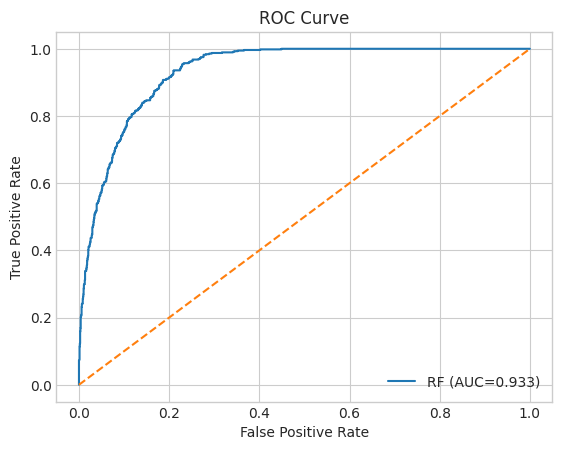

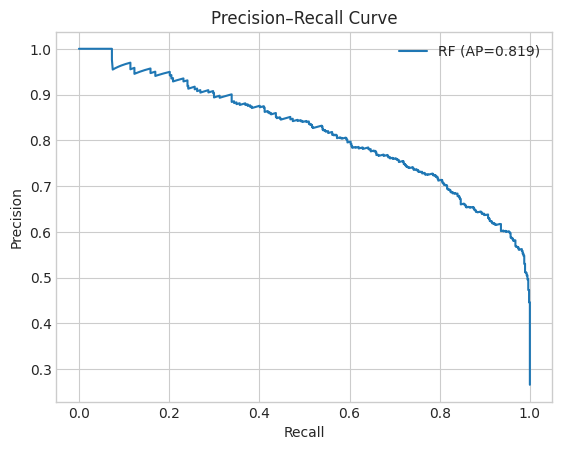

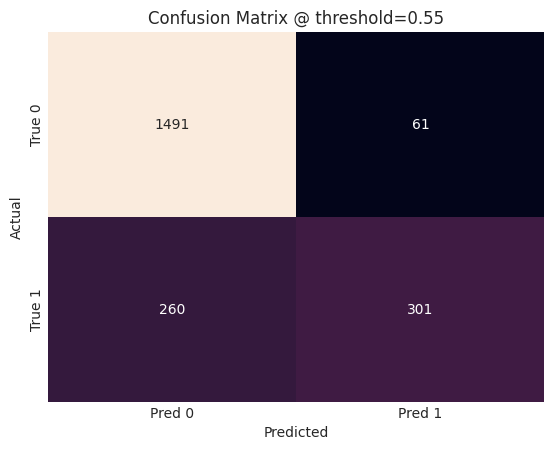

Counts → TN=1491, FP=61, FN=260, TP=301


In [55]:
# 1) Probabilities from Random Forest best tuned model.
rf_proba = rf_best.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_proba)
auc = roc_auc_score(y_test, rf_proba)
plt.figure(); plt.plot(fpr, tpr, label=f"RF (AUC={auc:.3f})"); plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC Curve"); plt.legend(); plt.show()

# Precision–Recall curve
prec, rec, _ = precision_recall_curve(y_test, rf_proba)
ap = average_precision_score(y_test, rf_proba)
plt.figure(); plt.plot(rec, prec, label=f"RF (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curve"); plt.legend(); plt.show()

# Confusion matrix heatmap @ chosen threshold
thresh = 0.55  # subject to cahnge based on the business strategy (precision vs recall)
rf_pred = (rf_proba >= thresh).astype(int)
cm = confusion_matrix(y_test, rf_pred, labels=[0,1])
plt.figure(); sns.heatmap(cm, annot=True, fmt="d", cbar=False, xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
plt.title(f"Confusion Matrix @ threshold={thresh}"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()
tn, fp, fn, tp = cm.ravel(); print(f"Counts → TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# STEP 9: Feature Importance
This section helps in identifying, determining the features (columns) which are most influential to the churn. Then these findings helps to convert in actions such as (e.g., target month-to-month + high-bill customers with retention offers).


Top Logistic Regression Features (↑ = churn risk):
TotalCharges: 64.85% (0.6485)
Contract_Month-to-month: 57.69% (0.5769)
InternetService_Fiber optic: 45.90% (0.4590)
PaymentMethod_Electronic check: 19.24% (0.1924)
OnlineSecurity_No: 14.89% (0.1489)
TechSupport_No: 13.55% (0.1355)
StreamingMovies_Yes: 11.68% (0.1168)
StreamingTV_Yes: 11.08% (0.1108)
SeniorCitizen: 7.90% (0.0790)
OnlineBackup_No: 3.25% (0.0325)

Top XGBoost Features (importance):
Contract_Month-to-month: 42.66% (0.4266)
InternetService_Fiber optic: 11.07% (0.1107)
OnlineSecurity_No: 7.62% (0.0762)
TechSupport_No: 6.29% (0.0629)
PaymentMethod_Electronic check: 2.98% (0.0298)
Contract_Two year: 2.64% (0.0264)
tenure: 2.37% (0.0237)
StreamingMovies_Yes: 2.00% (0.0200)
InternetService_No: 1.96% (0.0196)
Contract_One year: 1.78% (0.0178)

Top Random Forest Features (importance):
tenure: 14.40% (0.1440)
TotalCharges: 12.61% (0.1261)
Contract_Month-to-month: 10.41% (0.1041)
MonthlyCharges: 8.56% (0.0856)
OnlineSecurity_No: 5.

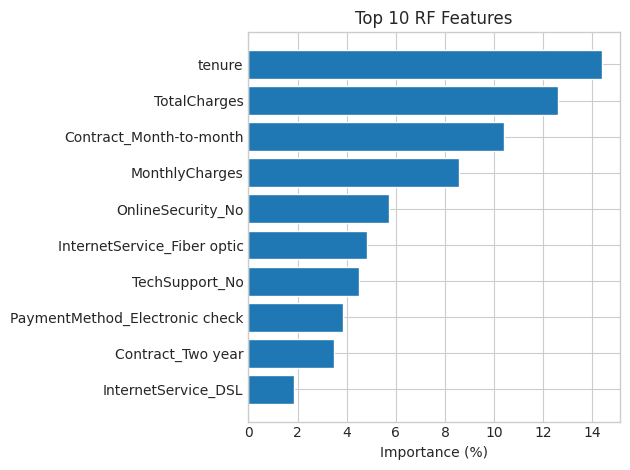

In [49]:
# STEP 9: Feature Importance
# Pick best or normal models (brings up the tuned models from hyperparameters,otherwise deafaults to the original pipeline models.)
logreg_final = globals().get("logreg_best", logreg_pipe)
rf_final     = globals().get("rf_best", rf_pipe)
xgb_final    = globals().get("xgb_best", globals().get("xgb_pipe", None))

# Get feature names from pipeline
prep = logreg_final.named_steps["preprocess"]
num_cols = prep.transformers_[0][2] #extracting the names of orignal numeeric columns
cat_cols = prep.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(prep.transformers_[1][2]) #same thing again.but for categorical data
features = np.concatenate([num_cols, cat_cols]) #putting both num and categorical columns in one list

# ---- Logistic Regression ----
coefs = logreg_final.named_steps["model"].coef_[0] #brings up the co-efficients of the features which have highest impact on churn.
top_log = pd.DataFrame({"Feature": features, "Coef": coefs}).sort_values("Coef", ascending=False).head(10)
print("\nTop Logistic Regression Features (↑ = churn risk):")
for _, row in top_log.iterrows():
    print(f"{row['Feature']}: {row['Coef']*100:.2f}% ({row['Coef']:.4f})")

# ---- XGBoost ----
xgb_imp = xgb_final.named_steps["model"].feature_importances_
top_xgb = pd.DataFrame({"Feature": features, "Imp": xgb_imp}).sort_values("Imp", ascending=False).head(10)
print("\nTop XGBoost Features (importance):")
for _, row in top_xgb.iterrows():
    print(f"{row['Feature']}: {row['Imp']*100:.2f}% ({row['Imp']:.4f})")

# ---- Random Forest ----
rf_imp = rf_final.named_steps["model"].feature_importances_ #for reducing the impurity in tree, the contribution of these features matters.
top_rf = pd.DataFrame({"Feature": features, "Imp": rf_imp}).sort_values("Imp", ascending=False).head(10)
print("\nTop Random Forest Features (importance):")
for _, row in top_rf.iterrows():
    print(f"{row['Feature']}: {row['Imp']*100:.2f}% ({row['Imp']:.4f})")
plt.figure(); tmp=top_rf.iloc[::-1]; plt.barh(tmp.Feature, tmp.Imp*100); plt.xlabel("Importance (%)"); plt.title("Top 10 RF Features"); plt.tight_layout(); plt.show()
#reverse (-1) so biggest variable values comes first

